In [103]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
import common as cm

# Part 1: Information Gain

Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries. 

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0. 

1.1 ) There are 10 objects (data) characterized with 5 binary attributes:

In [104]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [105]:
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

Hint: How one can read data (columns) in Pandas:

In [106]:
print(data["cl"])
print(list(data["cl"]))
print(set(data["cl"]))
print(data["attr 1"])
print(data)

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cl, dtype: int64
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
{0, 1}
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: attr 1, dtype: int64
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
0       1       0       1       1       1   1
1       1       1       0       0       1   1
2       0       1       1       1       1   1
3       1       0       1       0       1   0
4       1       0       0       1       1   0
5       0       0       1       1       1   1
6       1       1       1       1       1   1
7       1       0       0       1       1   1
8       0       1       0       0       1   0
9       0       0       0       1       1   0


Hint: How split data (Pandas DataFrame) base on column:

In [107]:
data[data['cl']==0]

,attr 1,attr 2,attr 3,attr 4,attr 5,cl
3,1,0,1,0,1,0
4,1,0,0,1,1,0
8,0,1,0,0,1,0
9,0,0,0,1,1,0


Hint: How take values from column (Pandas Series):

In [108]:
for id, row in data['cl'].items():
    print(id,row)

0 1
1 1
2 1
3 0
4 0
5 1
6 1
7 1
8 0
9 0


1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

In [109]:
def log_2(n):
    if n == 0:
        return 0
    return math.log(n, 2)

def getEntropy(cl: list):
    number_of_zeroes, number_of_ones = cl.count(0) / len(cl), cl.count(1) / len(cl)
    return - (number_of_zeroes * log_2(number_of_zeroes) + number_of_ones * log_2(number_of_ones))

1.4 ) Calculate the entropy for the CL vector  (the result should be 0.97095...):

In [110]:
result = getEntropy(data["cl"].to_list())
assert round(result, 5) ==  0.97095
result

0.9709505944546686

1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

In [111]:
def getConditionalEntropy(cl: list, attr: list):
    assert len(cl) == len(attr)

    result = 0
    for second in range(2):
        p_a = attr.count(second) / len(attr)
        for first in range(2):
            if p_a == 0:
                continue
            p_c_a = sum(c == first and a == second for c, a in zip(cl, attr)) / len(cl)
            result -= p_c_a * log_2(p_c_a / p_a)
    return result

1.6 ) Calculate conditional entropies for given attribiutes.

In [112]:
res1 = getConditionalEntropy(data["cl"].to_list(), data["attr 1"].to_list()) ### the result should be 0.95097...
print(res1)
assert round(res1, 5) == 0.95098

res2 = getConditionalEntropy(data["cl"].to_list(), data["attr 5"].to_list()) ### the result should be 0.97095...
print(res2)
assert round(res2, 5) == 0.97095

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?**

The first conditional entropy is lesser since it divides the data into less chaotic gropus.

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [113]:
def getInformationGain(cl, attr):
    return getEntropy(cl) - getConditionalEntropy(cl, attr)

In [114]:
print(getInformationGain(data["cl"].to_list(), data["attr 1"].to_list()))
print(getInformationGain(data["cl"].to_list(), data["attr 5"].to_list()))

0.01997309402197489
0.0


**Question: Which IG is lesser and why?**

The second information gain is lesser. It equals zero, because the attribute has the same value for every possible class and therefore splitting the tree on it doesn't improve the calssification at all.

It is an ideal example on low quality data which does not give any insight.

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf. 

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None). 
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

In [115]:
class Node:
    def __init__(self, attr, left, right, value):
        self.attr = attr
        self.left = left
        self.right = right
        self.value = value

    def __call__(self, obj):
        if self.value is None:
            if obj[self.attr] == 0:
                return self.left(obj)
            elif obj[self.attr] == 1:
                return self.right(obj)
            else:
                raise ValueError
        else:
            return self.value
        
### EXAMPLE
def example(obj):
    root = Node(0, None, None, None) ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = Node(1, None, None, None) ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = Node(None, None, None, 2) ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = Node(None, None, None, 3) ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = Node(None, None, None, 4) ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    print(root(obj))
    
example([0, 0]) ### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN.
### IT IS A LEAF WITH THE DECISION = 3
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN
example([0, 1]) 
example([1, 0])
example([1, 1])

3
4
2
2


2.1) Create an initial root. Set the value (decision) to 1.

In [116]:
root = Node(0, None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [117]:
### TODO
## SHOULD BE 0.4

result = cm.getErrorRate(root, data)
print(result)
assert result == 0.4, result


0.4


2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

In [118]:
cm.printGraph(root)

2.4) Calculate information gain for all attribiutes.

In [119]:
def get_information_gain_for_all_attributes(data):
    for attribute_name in attributeNames:
        yield getInformationGain(data["cl"].to_list(),data[attribute_name].to_list())

information_gain_list = list(get_information_gain_for_all_attributes(data))
print(information_gain_list)

[0.01997309402197489, 0.04643934467101529, 0.12451124978365313, 0.09127744624168, 0.0]


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root. 

In [120]:
best_to_split_attribute_index = information_gain_list.index(max(information_gain_list))
assert best_to_split_attribute_index == 2
root.attr = best_to_split_attribute_index
left_child = Node(None, None, None, 0)
root.left = left_child
right_child = Node(None, None, None, 1)
root.right = right_child

root.value = None

2.6) Print the graph and calculate the error rate. What happened with the error rate?

0.30000000000000004


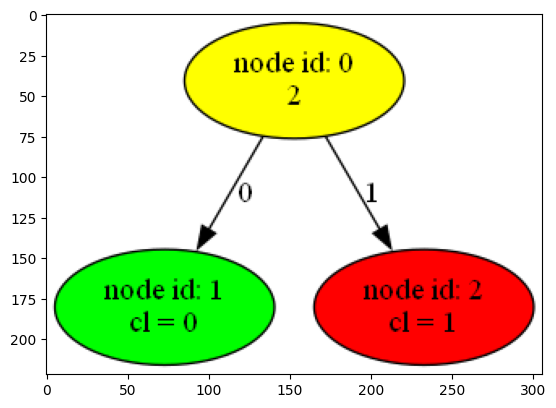

In [121]:
print(cm.getErrorRate(root, data))
cm.printGraph(root)
plt.imshow(plt.imread("DecisionTree.png"))

2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [122]:
### TODO
column_name = "attr "+str(best_to_split_attribute_index+1)
print(column_name)
left_data = data[data[column_name] == 0]
right_data = data[data[column_name] == 1]
print("left data:")
print(left_data)
print("right data:")
print(right_data)

attr 3
left data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
1       1       1       0       0       1   1
4       1       0       0       1       1   0
7       1       0       0       1       1   1
8       0       1       0       0       1   0
9       0       0       0       1       1   0
right data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
0       1       0       1       1       1   1
2       0       1       1       1       1   1
3       1       0       1       0       1   0
5       0       0       1       1       1   1
6       1       1       1       1       1   1


2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [123]:
### TODO
information_gain_list = list(get_information_gain_for_all_attributes(left_data))
print(information_gain_list)




[0.4199730940219749, 0.01997309402197489, 0.0, 0.01997309402197489, 0.0]


2.9) Choose the best attribute to split the data and then update the decision tree.

In [124]:
best_to_split_attribute_index = information_gain_list.index(max(information_gain_list))
print(best_to_split_attribute_index)
left_child.attr = best_to_split_attribute_index
left_left_child = Node(None, None, None, 0)
left_child.left = left_left_child
left_right_child = Node(None, None, None, 1)
left_child.right = left_right_child
left_child.value = None

0


2.10) Print the graph and calculate the error rate (HINT: should be 0.2 :). What happened with the error rate?

0.19999999999999996


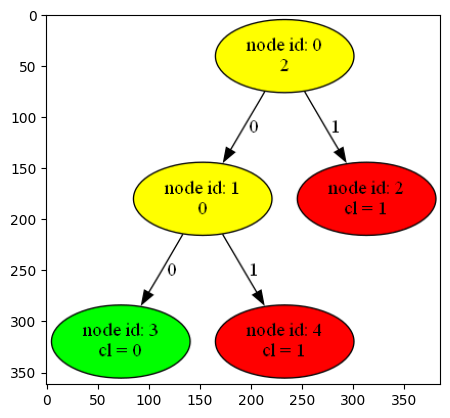

In [125]:
print(cm.getErrorRate(root, data))
cm.printGraph(root)
plt.imshow(plt.imread("DecisionTree.png"))

2.11) Split data (remember that we split left_data, not data).

In [126]:
### TODO
column_name = "attr "+str(best_to_split_attribute_index+1)
print(column_name)
leftLeft_data = left_data[left_data[column_name] == 0]
leftRight_data = left_data[left_data[column_name] == 1]
print("left left data:")
print(leftLeft_data)
print("left right data:")
print(leftRight_data)

attr 1
left left data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
8       0       1       0       0       1   0
9       0       0       0       1       1   0
left right data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
1       1       1       0       0       1   1
4       1       0       0       1       1   0
7       1       0       0       1       1   1


2.12) Repeat the whole process for the right node.

In [127]:
# TODO compute the information gain
information_gain_list = list(get_information_gain_for_all_attributes(right_data))
print(information_gain_list)

[0.17095059445466865, 0.17095059445466865, 0.0, 0.7219280948873623, 0.0]


In [128]:
# TODO update the decision tree
best_to_split_attribute_index = information_gain_list.index(max(information_gain_list))
print(best_to_split_attribute_index)
right_child.attr = best_to_split_attribute_index
right_left_child = Node(None, None, None, 0)
right_child.left = right_left_child
right_right_child = Node(None, None, None, 1)
right_child.right = right_right_child
right_child.value = None

3


0.09999999999999998


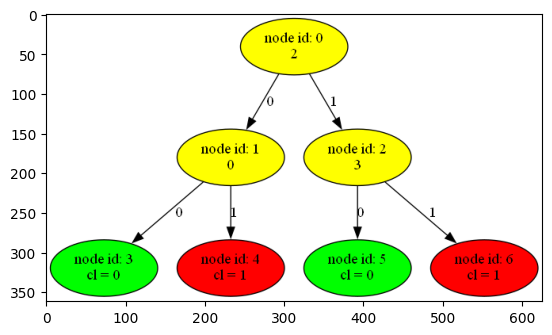

In [129]:
# TODO print the decision tree and calculate the error rate (HINT, should be 0.1:)
print(cm.getErrorRate(root, data))
cm.printGraph(root)
plt.imshow(plt.imread("DecisionTree.png"))

In [130]:
### TODO
column_name = "attr "+str(best_to_split_attribute_index+1)
print(column_name)
rightLeft_data = right_data[right_data[column_name] == 0]
rightRight_data = right_data[right_data[column_name] == 1]
print("right left data:")
print(rightLeft_data)
print("right right data:")
print(rightRight_data)

attr 4
right left data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
3       1       0       1       0       1   0
right right data:
   attr 1  attr 2  attr 3  attr 4  attr 5  cl
0       1       0       1       1       1   1
2       0       1       1       1       1   1
5       0       0       1       1       1   1
6       1       1       1       1       1   1


2.13) Let's consider left-left node. Calculate information gain for it.

In [131]:
# TODO
information_gain_list = list(get_information_gain_for_all_attributes(leftLeft_data))
print(information_gain_list)

[-0.0, -0.0, -0.0, -0.0, -0.0]


2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

Adding a new node won't improve the effectivness of the tree since all calculated information gains are equal to 0. Therefore splitting on any atrribute will not improve the quality of classification.

2.15) Calculate information gain for the left-right node.

In [132]:
information_gain_list = list(get_information_gain_for_all_attributes(leftRight_data))
print(information_gain_list)

[0.0, 0.2516291673878229, 0.0, 0.2516291673878229, 0.0]


In [133]:
### Select the attribute and update the tree
best_to_split_attribute_index = information_gain_list.index(max(information_gain_list))
print(best_to_split_attribute_index)
left_right_child.attr = best_to_split_attribute_index
left_right_left_child = Node(None, None, None, 0)
left_right_child.left = left_right_left_child
left_right_right_child = Node(None, None, None, 1)
left_right_child.right = left_right_right_child
left_right_child.value = None

1


0.09999999999999998


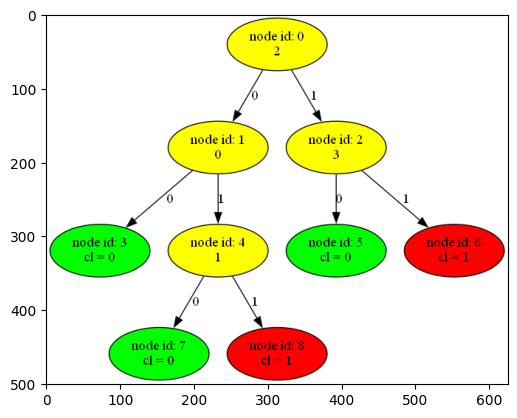

In [134]:
### Print the decision tree and compute the error rate
print(cm.getErrorRate(root, data))
cm.printGraph(root)
plt.imshow(plt.imread("DecisionTree.png"))

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

The error rate hasn't improved therefore it is not necessary to keep two added leaves.

2.17) Finish creating the right side of the tree

In [135]:
### TODO
#right left node
information_gain_list = list(get_information_gain_for_all_attributes(rightLeft_data))
print(information_gain_list)

[-0.0, -0.0, -0.0, -0.0, -0.0]


In [136]:
# best_to_split_attribute_index = information_gain_list.index(max(information_gain_list))
# print(best_to_split_attribute_index)
# right_left_child.attr = best_to_split_attribute_index
# right_left_left_child = Node(None, None, None, 0)
# right_left_child.left = right_left_left_child
# right_left_right_child = Node(None, None, None, 1)
# left_right_child.right = right_left_right_child 
# right_left_child.value = None

In [137]:
# column_name = "attr "+str(best_to_split_attribute_index+1)
# print(column_name)
# rightLeftLeft_data = rightLeft_data[rightLeft_data[column_name] == 0]
# rightLeftRight_data = rightLeft_data[rightLeft_data[column_name] == 1]
# print("right left left data:")
# print(rightLeftLeft_data)
# print("right left right data:")
# print(rightLeftRight_data)

In [138]:
### Print the decision tree and compute the error rate
print(cm.getErrorRate(root, data))
cm.printGraph(root)

0.09999999999999998


In [139]:
#right right node
information_gain_list = list(get_information_gain_for_all_attributes(rightRight_data))
print(information_gain_list)

[-0.0, -0.0, -0.0, -0.0, -0.0]


There's no need to split the right node children since all of the IGs are equal to 0

# Part 3: automated construction of decision trees

3.1 Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

In [140]:
max_depth = 1

def createTree(data: pd.DataFrame, depth=1):
    # print(depth, data)

    information_gain_list = list(get_information_gain_for_all_attributes(data))
    best_to_split_attribute_index = information_gain_list.index(max(information_gain_list)) + 1
    column_name = f"attr {best_to_split_attribute_index}"
    left_data = data[data[column_name] == 0]
    right_data = data[data[column_name] == 1]

    root = Node(best_to_split_attribute_index, None, None, None)

    if depth == max_depth:
        root.left = Node(None, None, None, 0)
        root.right = Node(None, None, None, 1)
        return root

    root.left = Node(None, None, None, 0) if left_data.empty else createTree(left_data, depth + 1)
    root.right = Node(None, None, None, 1) if right_data.empty else createTree(right_data, depth + 1)
    return root

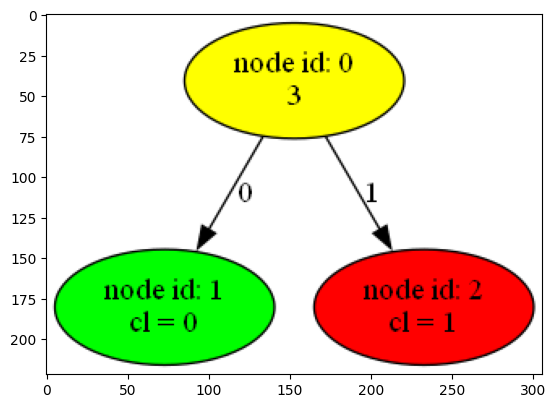

In [141]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]
data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

result = createTree(data)
cm.printGraph(result)
plt.imshow(plt.imread("DecisionTree.png"))

3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [142]:
# Training dataset
attributeNames, train_data = cm.getTrainingDataSet()

print(attributeNames)

['attr 1', 'attr 2', 'attr 3', 'attr 4', 'attr 5', 'attr 6']


In [143]:
max_depth = 2

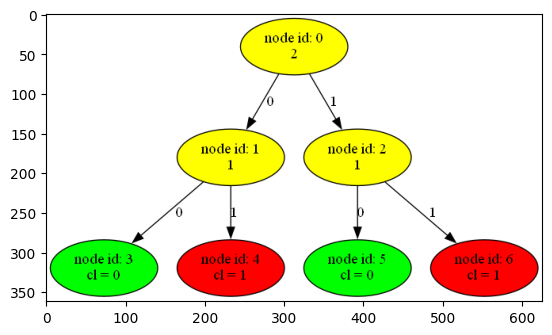

In [144]:
result = createTree(train_data)
cm.printGraph(result, size=100)
plt.imshow(plt.imread("DecisionTree.png"))

In [145]:
cm.getErrorRate(result, train_data)

0.65

In [146]:
# Validation dataset
valid_attributesName, valid_data = cm.getValidationDataSet()
cm.getErrorRate(result, valid_data)

0.5

# Comparison of error for different _max_depth_

In [147]:
for i in range(1, 11):
    max_depth = i
    attributeNames, train_data = cm.getTrainingDataSet()
    valid_attributesName, valid_data = cm.getValidationDataSet()

    result = createTree(train_data)
    print(f"max_depth: {i} train_error: {cm.getErrorRate(result, train_data)} valid_error: {cm.getErrorRate(result, valid_data)}")

max_depth: 1 train_error: 0.5 valid_error: 0.4
max_depth: 2 train_error: 0.65 valid_error: 0.5
max_depth: 3 train_error: 0.6 valid_error: 0.19999999999999996
max_depth: 4 train_error: 0.5 valid_error: 0.4
max_depth: 5 train_error: 0.5 valid_error: 0.5
max_depth: 6 train_error: 0.65 valid_error: 0.5
max_depth: 7 train_error: 0.65 valid_error: 0.5
max_depth: 8 train_error: 0.65 valid_error: 0.5
max_depth: 9 train_error: 0.65 valid_error: 0.5
max_depth: 10 train_error: 0.65 valid_error: 0.5


3.3) Consider only the training data set and answer the following questions:
* What is the maximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate.

We can see that the train error's lowest value is 0.5. All the values with max_depth > 5 are greater than it.
Therefore, we can say that depth of 5 is the maximum one.

We could also look at the number of attributes.
It is equal to 6, so we can be sure if the depth is larger than that, the choices made in the tree would be irrelevant.
They would be made on already decided attributes values.

From the examples the building process should stop when there is no improvement in error rate in 3 consecutive steps.
There is no improvement for training data with max_depth > 1